In [1]:
import sys
import numpy as np
import pandas as pd
from pandas_datareader import data
from matplotlib import pyplot as plt
import datetime

In [2]:
# companies to be investigated
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'Navister': 'NAV',
    'IBM': 'IBM',
    'Texes Instruments': 'TXN',
    'Master Card': 'MA',
    'Microsoft': 'MSFT',
    'General Electric': 'GE',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'CO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mitsubishin': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC',
    'Deutsche Bank': 'DB',
    'Alibaba': 'BABA',
    'Pfizer': 'PFE',
    'Nestle': 'NSRGY',
    'Uniliver': 'UN',
    'P&G': 'PG'
    }
#companies = sorted(companies_dict.items(), key=lambda x: x[1])
companies = list(companies_dict.items())

In [3]:
# online data source
source = 'yahoo'

# start date and end date
startDate = '2015-01-01'
endDate = '2020-06-01'

# import the date using pandas_datareader
rawData = data.DataReader(list(companies_dict.values()), source, startDate, endDate)

# print axes labels
print(rawData.axes)

[DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=1362, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'CVX'),
            (   'Volume',   'VLO'),
            (   'Volume',     'F'),
            (   'Volume',   'BAC'),
            (

In [4]:
# get the opening and closing stocks
stockOpen = rawData['Open']
stockClose = rawData['Close']

# print opening stocks for day1
print(stockOpen.iloc[0])

Symbols
AMZN     312.579987
AAPL     111.389999
WBA       76.110001
NOC      148.289993
BA       131.070007
LMT      192.100006
MCD       94.129997
INTC      36.669998
NAV       33.820000
IBM      161.309998
TXN       53.560001
MA        86.680000
MSFT      46.660000
GE        24.365385
AXP       93.169998
PEP       94.930000
CO         4.590000
JNJ      105.050003
TM       126.230003
HMC       29.670000
MSBHY     36.709999
SNE       20.469999
XOM       92.250000
CVX      111.629997
VLO       49.549999
F         15.590000
BAC       17.990000
DB        30.590000
BABA     104.239998
PFE       31.270000
NSRGY     72.910004
UN        38.919998
PG        90.839996
Name: 2015-01-02 00:00:00, dtype: float64


In [5]:
stock_closed = np.array(stockClose).T
stock_open = np.array(stockOpen).T

row, col = stock_closed.shape
print(row)
print(col)

33
1362


In [6]:
# calculate daily stock difference for each company
diff = np.zeros([row, col])

diff = np.subtract(stock_closed, stock_open)
    

In [7]:
for i in range(0, len(companies)):
    print('Company: {} Change: {}'. format(companies[i][0], sum(diff[i][:])))

Company: Amazon Change: -42.1201171875
Company: Apple Change: 201.76995849609375
Company: Walgreen Change: -27.030029296875
Company: Northrop Grumman Change: 78.30001831054688
Company: Boeing Change: -56.98047637939453
Company: Lockheed Martin Change: 33.100311279296875
Company: McDonalds Change: 44.920143127441406
Company: Intel Change: 42.6199893951416
Company: Navister Change: -40.899978160858154
Company: IBM Change: -1.719818115234375
Company: Texes Instruments Change: 53.5599250793457
Company: Master Card Change: 65.08002471923828
Company: Microsoft Change: 31.469924926757812
Company: General Electric Change: -7.518034934997559
Company: American Express Change: -10.96978759765625
Company: Pepsi Change: 45.140106201171875
Company: Coca Cola Change: -5.2399914264678955
Company: Johnson & Johnson Change: 36.959808349609375
Company: Toyota Change: -49.670082092285156
Company: Honda Change: -20.370019912719727
Company: Mitsubishin Change: 40.88689613342285
Company: Sony Change: -15.140

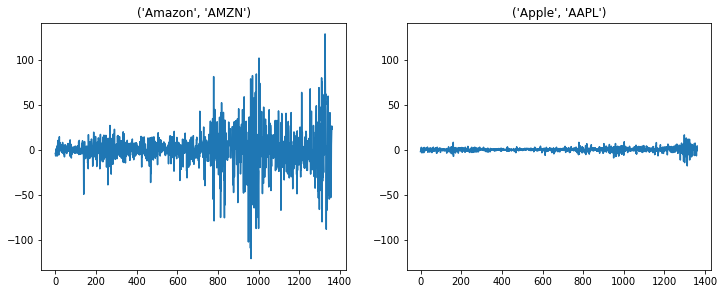

In [8]:
# visualization of the data
plt.figure(figsize=(12, 10))
ax1 = plt.subplot(221)
plt.plot(diff[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(diff[1][:])
plt.title(companies[1])
plt.show()

In [9]:
# normalize the data
from sklearn.preprocessing import Normalizer
norml = Normalizer()
normDiff = norml.fit_transform(diff)

print(normDiff.max())
print(normDiff.min())
print(normDiff.mean())

0.25568254552670877
-0.3870569065918154
-9.630828364734155e-05


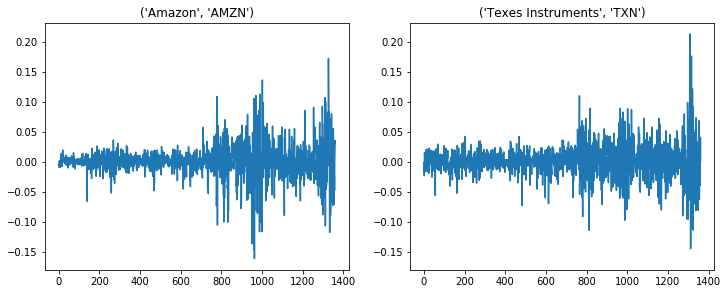

In [10]:
# visualization of the data
plt.figure(figsize=(12, 10))
ax1 = plt.subplot(221)
plt.plot(normDiff[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(normDiff[10][:])
plt.title(companies[10])
plt.show()

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

'''
The steps in the pipeline
1. Normalize the data
2. Kmeans clustering
'''

# define a normalizer
norm = Normalizer()

# define a kmeans model
kmeans = KMeans(n_clusters=10, max_iter=1000, n_init=20)

# define the pipeline
pipeline = make_pipeline(norm, kmeans)

In [12]:
# fit the pipeline to daily stock movements
pipeline.fit(diff)
print(kmeans.inertia_)

11.646938720678978


In [13]:
# predict the cluster labels
labels = pipeline.predict(diff)

# align the labels with companies
df = pd.DataFrame({'labels': labels, 'Companies': companies})

# print the clusters and companies
print(df.sort_values('labels'))

    labels                 Companies
14       0   (American Express, AXP)
11       0         (Master Card, MA)
6        0          (McDonalds, MCD)
26       0    (Bank of America, BAC)
25       1                 (Ford, F)
19       1              (Honda, HMC)
18       1              (Toyota, TM)
13       1    (General Electric, GE)
9        1                (IBM, IBM)
21       1               (Sony, SNE)
27       1       (Deutsche Bank, DB)
4        1              (Boeing, BA)
2        1           (Walgreen, WBA)
15       2              (Pepsi, PEP)
17       2  (Johnson & Johnson, JNJ)
29       2             (Pfizer, PFE)
32       2                 (P&G, PG)
8        3           (Navister, NAV)
22       4              (Exxon, XOM)
24       4      (Valero Energy, VLO)
23       4            (Chevron, CVX)
28       5           (Alibaba, BABA)
0        5            (Amazon, AMZN)
12       5         (Microsoft, MSFT)
10       5  (Texes Instruments, TXN)
7        5             (Intel, INTC)
1

In [14]:
from sklearn.decomposition import PCA

# reduce the data to 2 dimensions
pcaData = PCA(n_components=2).fit_transform(normDiff)


# run KMeans clustring of PCA reduced data
kmeans = KMeans(n_clusters=10, max_iter=1000, n_init=20)
kmeans.fit(pcaData)
clusters = kmeans.predict(pcaData)

# make the panadas dataFrame with new reduced data
df = pd.DataFrame({'Clusters': clusters, 'COmpanies': companies})

# print the companies with assigned clusters
print(df.sort_values('Clusters'))

    Clusters                 COmpanies
0          0            (Amazon, AMZN)
1          0             (Apple, AAPL)
7          0             (Intel, INTC)
12         0         (Microsoft, MSFT)
10         0  (Texes Instruments, TXN)
11         0         (Master Card, MA)
2          1           (Walgreen, WBA)
20         1      (Mitsubishin, MSBHY)
6          1          (McDonalds, MCD)
9          1                (IBM, IBM)
17         2  (Johnson & Johnson, JNJ)
15         2              (Pepsi, PEP)
32         2                 (P&G, PG)
13         3    (General Electric, GE)
27         3       (Deutsche Bank, DB)
25         3                 (Ford, F)
23         3            (Chevron, CVX)
22         3              (Exxon, XOM)
18         4              (Toyota, TM)
19         4              (Honda, HMC)
16         4           (Coca Cola, CO)
31         5            (Uniliver, UN)
29         5             (Pfizer, PFE)
30         5           (Nestle, NSRGY)
28         6           (A

<Figure size 432x288 with 0 Axes>

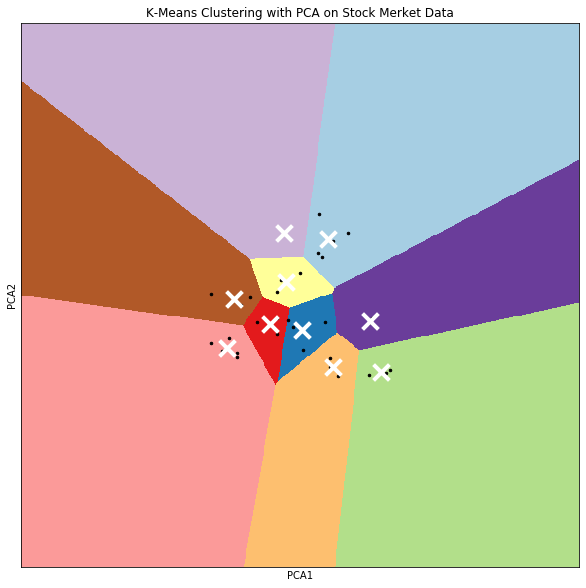

In [15]:
#visualize high dimensional clusters

#set size for the mesh
h = 0.005

#generate mesh grid
xmin, xmax = pcaData[:, 0].min() - 1, pcaData[:, 0].max() + 1
ymin, ymax = pcaData[:, 1].min() - 1, pcaData[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

#label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#generate color plots from the results
plt.clf()
cmap = plt.cm.Paired
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = cmap, aspect = 'auto', origin = 'lower')

#plot the principle components on the color map
plt.plot(pcaData[:, 0], pcaData[:, 1], 'k.', markersize = 5)

#plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250,
           linewidth = 4, color = 'w', zorder = 10)

#set plot title and limits
plt.title('K-Means Clustering with PCA on Stock Merket Data')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xticks(())
plt.yticks(())

#show the plot
plt.show()